In [1]:
!pip3 install torch torchvision torchaudio


   ---------------------------------------- 0.0/192.3 MB ? eta -:--:--
   ---------------------------------------- 0.2/192.3 MB 3.3 MB/s eta 0:00:59
   ---------------------------------------- 0.3/192.3 MB 3.5 MB/s eta 0:00:56
   ---------------------------------------- 0.8/192.3 MB 5.8 MB/s eta 0:00:33
   ---------------------------------------- 1.1/192.3 MB 5.6 MB/s eta 0:00:35
   ---------------------------------------- 1.2/192.3 MB 5.2 MB/s eta 0:00:37
   ---------------------------------------- 1.3/192.3 MB 5.4 MB/s eta 0:00:36
   ---------------------------------------- 1.3/192.3 MB 5.4 MB/s eta 0:00:36
   ---------------------------------------- 1.3/192.3 MB 5.4 MB/s eta 0:00:36
   ---------------------------------------- 1.6/192.3 MB 3.9 MB/s eta 0:00:50
   ---------------------------------------- 1.9/192.3 MB 3.9 MB/s eta 0:00:49
   ---------------------------------------- 2.0/192.3 MB 3.9 MB/s eta 0:00:49
   ---------------------------------------- 2.2/192.3 MB 3.9 MB/s eta 0

In [23]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [24]:
!cd yolov5 & pip install -r requirements.txt

In [25]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [26]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

model

Using cache found in C:\Users\Pratap Singha/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-12-6 Python-3.11.3 torch-2.1.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [27]:
img = "https://assets-global.website-files.com/628905bae461d31c437ea344/63d40a305c85f36ca69a8478_Congestion.jpg"

In [28]:
result = model(img)
result.print()

image 1/1: 1080x1920 41 cars, 2 buss, 6 trucks
Speed: 810.7ms pre-process, 273.4ms inference, 21.0ms NMS per image at shape (1, 3, 384, 640)


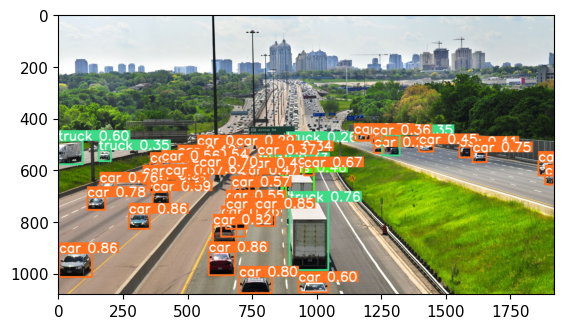

In [29]:
%matplotlib inline 
plt.imshow(np.squeeze(result.render()))

plt.show()

# Capture real time object

In [30]:
video = cv2.VideoCapture(0)

while video.isOpened():
    ret, frame = video.read()
    
    result = model(frame)
    
    cv2.imshow("yoloV5", np.squeeze(result.render()))
    
    if cv2.waitKey(20) & 0xFF == ord("p"):
        break
video.release()
cv2.destroyAllWindows()


# MODEL FROM SCRATCH WITH CUSTOM DATASET

In [31]:
import uuid
import os
import time

In [12]:
IMAGE_PATH =os.path.join("data", "images")

labels = ["Awake", "Drowsy"]

image_taken = 20

In [25]:
video = cv2.VideoCapture(0)

for label in labels:
    print("Collecting images for {}".format(labels))
    time.sleep(2)
    
    for image in range(image_taken):
        print("Collecting images for {}, image number {}".format(labels, image))
        
        
        rer, frame = video.read()
        
        imgname = os.path.join(IMAGE_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(imgname, frame)
        cv2.imshow("image collection", frame)
        time.sleep(2)
        
        if cv2.waitKey(20) & 0xFF == ord("p"):
            break
video.release()
cv2.destroyAllWindows()

In [20]:
for label in labels:
    print("Collecting images for {}".format(labels))
    for image in range(image_taken):
        print("Collecting images for {}, image number {}".format(labels, image))

In [26]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [32]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [34]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 20 --data coustomdata.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=coustomdata.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\Pratap': No such file or directory
YOLOv5  2023-12-6 Python-3.11.3 torch-2.1.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0

In [21]:
!pip install git --upgrade

ERROR: Could not find a version that satisfies the requirement git (from versions: none)
ERROR: No matching distribution found for git


In [22]:
!pip install git

ERROR: Could not find a version that satisfies the requirement git (from versions: none)
ERROR: No matching distribution found for git


In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp10/weights/last.pt', force_reload=True)

In [ ]:
img = os.path.join('data', 'images', 'awake.c9a24d48-e1f6-11eb-bbef-5cf3709bbcc6.jpg')

In [ ]:
results = model(img)

In [ ]:
results.print()

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()